In [1]:
import pandas as pd
import numpy as np
import pickle

from tqdm import tqdm

from models import Model1, Model2, Model3
from tools import Train, validation, GridSearch

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
with open('data/train_dataset.pickle', 'rb') as f:
    train_dataset = pickle.load(f)

with open('data/val_dataset.pickle', 'rb') as f:
    val_dataset = pickle.load(f)

with open('data/test_dataset.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [4]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [5]:
criterion = nn.MSELoss()
eval_metrics = [
    r2_score,
    mean_absolute_error
]

# Model 1

In [6]:
basic_params = {
    'T': 60,
    'n': 40
}

param_grid = {
    'm': [32, 40],
    'cnn_kernel_height': [10, 20, 30],
    'cnn_hidden_size': [32, 40],
    'skip_hidden_size': [32, 40],
    'skip': [8, 10]
}

grid_model1 = GridSearch(criterion, eval_metrics, device, temp_save_path='checkpoints/model_by_param/temp_model_123.pt', masked=False)
model_name = 'model1'
best_model1 = grid_model1.train_by_grid(
        Model1, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total  48 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:20<00:00, 18.52it/s, Train Loss=0.8505, Valid Loss=0.2492, Valid R2=0.4377, Valid MAE=0.3827]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [02:19<00:00, 18.71it/s, Train Loss=0.8136, Valid Loss=0.1725, Valid R2=0.6109, Valid MAE=0.3033]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [02:21<00:00, 18.36it/s, Train Loss=0.8567, Valid Loss=0.1980, Valid R2=0.5533, Valid MAE=0.3473]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [02:21<00:00, 18.42it/s, Train Loss=0.8279, Valid Loss=0.2871, Valid R2=0.3522, Valid MAE=0.3989]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:28<00:00, 17.60it/s, Train Loss=0.8215, Valid Loss=0.1599, Valid R2=0.6392, Valid MAE=0.3323]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:27<00:00, 17.62it/s, Train Loss=0.7990, Valid Loss=0.2038, Valid R2=0.5401, Valid MAE=0.3478]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [02:28<00:00, 17.59it/s, Train Loss=0.7876, Valid Loss=0.1657, Valid R2=0.6262, Valid MAE=0.3306]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:27<00:00, 17.64it/s, Train Loss=0.8850, Valid Loss=0.2107, Valid R2=0.5245, Valid MAE=0.3616]


Early Stopped
Setting   8 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:57<00:00, 22.27it/s, Train Loss=0.8388, Valid Loss=0.2820, Valid R2=0.3638, Valid MAE=0.4266]


Early Stopped
Setting   9 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [01:58<00:00, 21.93it/s, Train Loss=0.7828, Valid Loss=0.2572, Valid R2=0.4197, Valid MAE=0.3843]


Early Stopped
Setting  10 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [01:57<00:00, 22.20it/s, Train Loss=0.8316, Valid Loss=0.2349, Valid R2=0.4699, Valid MAE=0.3776]


Early Stopped
Setting  11 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:56<00:00, 22.39it/s, Train Loss=0.7725, Valid Loss=0.3128, Valid R2=0.2943, Valid MAE=0.4135]


Early Stopped
Setting  12 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [02:02<00:00, 21.28it/s, Train Loss=0.9138, Valid Loss=0.1684, Valid R2=0.6200, Valid MAE=0.3298]


Early Stopped
Setting  13 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [02:04<00:00, 20.98it/s, Train Loss=0.8676, Valid Loss=0.2265, Valid R2=0.4888, Valid MAE=0.3707]


Early Stopped
Setting  14 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [02:03<00:00, 21.16it/s, Train Loss=0.9250, Valid Loss=0.1421, Valid R2=0.6794, Valid MAE=0.2837]


Early Stopped
Setting  15 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [02:02<00:00, 21.31it/s, Train Loss=0.8089, Valid Loss=0.2013, Valid R2=0.5459, Valid MAE=0.3439]


Early Stopped
Setting  16 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:35<00:00, 27.29it/s, Train Loss=0.8479, Valid Loss=0.3084, Valid R2=0.3042, Valid MAE=0.4419]


Early Stopped
Setting  17 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:36<00:00, 27.01it/s, Train Loss=0.8660, Valid Loss=0.2338, Valid R2=0.4726, Valid MAE=0.3657]


Early Stopped
Setting  18 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [01:37<00:00, 26.76it/s, Train Loss=0.8074, Valid Loss=0.1874, Valid R2=0.5771, Valid MAE=0.3365]


Early Stopped
Setting  19 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [01:35<00:00, 27.19it/s, Train Loss=0.8317, Valid Loss=0.2266, Valid R2=0.4887, Valid MAE=0.3742]


Early Stopped
Setting  20 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [01:38<00:00, 26.60it/s, Train Loss=0.8292, Valid Loss=0.1613, Valid R2=0.6361, Valid MAE=0.3301]


Early Stopped
Setting  21 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [01:41<00:00, 25.70it/s, Train Loss=0.8293, Valid Loss=0.1774, Valid R2=0.5997, Valid MAE=0.3409]


Early Stopped
Setting  22 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [01:38<00:00, 26.35it/s, Train Loss=0.8506, Valid Loss=0.1976, Valid R2=0.5541, Valid MAE=0.3487]


Early Stopped
Setting  23 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [01:39<00:00, 26.30it/s, Train Loss=0.7551, Valid Loss=0.2421, Valid R2=0.4537, Valid MAE=0.3810]


Early Stopped
Setting  24 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [02:21<00:00, 18.40it/s, Train Loss=0.7835, Valid Loss=0.1461, Valid R2=0.6703, Valid MAE=0.3113]


Early Stopped
Setting  25 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:22<00:00, 18.34it/s, Train Loss=0.8253, Valid Loss=0.1476, Valid R2=0.6671, Valid MAE=0.3247]


Early Stopped
Setting  26 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:20<00:00, 18.58it/s, Train Loss=0.8034, Valid Loss=0.2123, Valid R2=0.5209, Valid MAE=0.3604]


Early Stopped
Setting  27 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [02:19<00:00, 18.64it/s, Train Loss=0.7861, Valid Loss=0.2747, Valid R2=0.3802, Valid MAE=0.3924]


Early Stopped
Setting  28 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [02:29<00:00, 17.43it/s, Train Loss=0.8177, Valid Loss=0.1603, Valid R2=0.6383, Valid MAE=0.3241]


Early Stopped
Setting  29 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [02:30<00:00, 17.36it/s, Train Loss=0.8066, Valid Loss=0.2001, Valid R2=0.5484, Valid MAE=0.3606]


Early Stopped
Setting  30 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [02:29<00:00, 17.43it/s, Train Loss=0.7042, Valid Loss=0.1803, Valid R2=0.5933, Valid MAE=0.3383]


Early Stopped
Setting  31 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [02:29<00:00, 17.49it/s, Train Loss=0.7159, Valid Loss=0.2317, Valid R2=0.4771, Valid MAE=0.3739]


Early Stopped
Setting  32 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:58<00:00, 21.96it/s, Train Loss=0.8098, Valid Loss=0.2100, Valid R2=0.5262, Valid MAE=0.3754]


Early Stopped
Setting  33 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:00<00:00, 21.65it/s, Train Loss=0.7996, Valid Loss=0.3920, Valid R2=0.1155, Valid MAE=0.5091]


Early Stopped
Setting  34 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:58<00:00, 22.06it/s, Train Loss=0.7601, Valid Loss=0.1635, Valid R2=0.6311, Valid MAE=0.3240]


Early Stopped
Setting  35 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:58<00:00, 22.01it/s, Train Loss=0.8264, Valid Loss=0.1486, Valid R2=0.6648, Valid MAE=0.2952]


Early Stopped
Setting  36 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [02:06<00:00, 20.66it/s, Train Loss=0.8202, Valid Loss=0.1686, Valid R2=0.6196, Valid MAE=0.3272]


Early Stopped
Setting  37 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [02:04<00:00, 20.98it/s, Train Loss=0.8505, Valid Loss=0.1536, Valid R2=0.6535, Valid MAE=0.3028]


Early Stopped
Setting  38 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:04<00:00, 21.00it/s, Train Loss=0.7791, Valid Loss=0.1852, Valid R2=0.5821, Valid MAE=0.3588]


Early Stopped
Setting  39 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:05<00:00, 20.74it/s, Train Loss=0.7640, Valid Loss=0.2468, Valid R2=0.4432, Valid MAE=0.3773]


Early Stopped
Setting  40 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:34<00:00, 27.51it/s, Train Loss=0.7963, Valid Loss=0.1654, Valid R2=0.6268, Valid MAE=0.3105]


Early Stopped
Setting  41 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [01:34<00:00, 27.49it/s, Train Loss=0.8328, Valid Loss=0.2419, Valid R2=0.4542, Valid MAE=0.3709]


Early Stopped
Setting  42 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:34<00:00, 27.53it/s, Train Loss=0.7962, Valid Loss=0.2051, Valid R2=0.5372, Valid MAE=0.3535]


Early Stopped
Setting  43 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [01:34<00:00, 27.64it/s, Train Loss=0.7925, Valid Loss=0.2464, Valid R2=0.4440, Valid MAE=0.4092]


Early Stopped
Setting  44 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:38<00:00, 26.52it/s, Train Loss=0.8090, Valid Loss=0.1585, Valid R2=0.6424, Valid MAE=0.3301]


Early Stopped
Setting  45 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:39<00:00, 26.32it/s, Train Loss=0.8142, Valid Loss=0.2579, Valid R2=0.4180, Valid MAE=0.3919]


Early Stopped
Setting  46 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:38<00:00, 26.42it/s, Train Loss=0.8114, Valid Loss=0.2261, Valid R2=0.4899, Valid MAE=0.3737]


Early Stopped
Setting  47 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [01:37<00:00, 26.70it/s, Train Loss=0.8274, Valid Loss=0.2552, Valid R2=0.4242, Valid MAE=0.4069]


Early Stopped


Test Loss: 0.1870 | Test R2: 0.8984 | Test MAE: 0.3569
Saving Process Complete. Directory: model1_losses.png


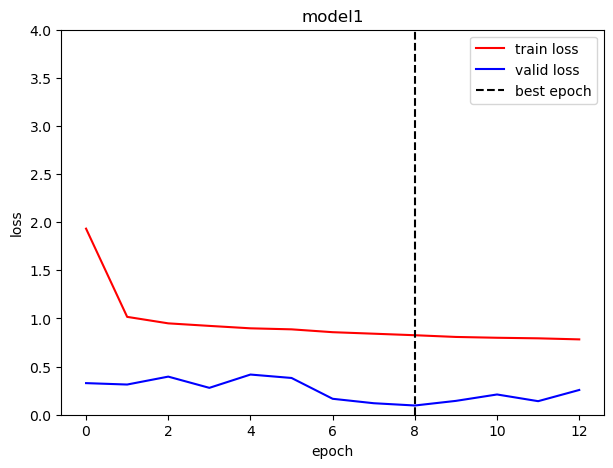

In [7]:
grid_model1.test(test_loader)
grid_model1.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')